# （二） 线性回归 linear regression

线性回归是利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的一种统计分析方法.**可用于预测和相关性分析(即“因子分析”,因子分析是根据回归分析结果，得出各个自变量对目标变量产生的影响，因此，需要求出各个自变量的影响程度)**.回归分析中，只包括一个自变量和一个因变量，且二者的关系可用一条直线近似表示，这种回归分析称为**一元线性回归分析**.如果回归分析中包括两个或两个以上的自变量，且因变量和自变量之间是线性关系，则称为**多元线性回归分析**.

$$f(x)=w_1x_1+w_2x_2+...+w_nx_n+b$$

其向量表达形式为$f(x) = wx+b$，这里$x$表示样本，$x_1,x_2,x_3...$表示属性

### 性能度量

**均方误差(square loss)**$$\sum_{i=1}^m(f(x_i)-y_i)^2=\sum_{i=1}^m(y_i-wx_i-b)^2$$这里m示样本数量,$x_i$表示样本$i$,然后$x_{i1},x_{i,2},x_{i,3}...$表示其特征

### 一元线性回归

原始模型$x_i=(x_{i1}),w=(w),y=(y_1,y_2,...,y_m):$$$f(x_i)=wx_{i1}+b$$

目标函数：$$argmin_{(w,b)}E_{w,b}=\sum_{i=1}^{m}(y_i-wx_{i1}-b)^2$$

### 多元线性回归

原始模型$x_i=(x_{i1},x_{i2},...,x_{in})$,$w=(w_1,w_2,...,w_n)$,这里为了方便我们使用$x_i=(x_{i1},x_{i2},...,x_{in},1)$,$w=(w_1,w_2,...,w_n,b)$将$b$一起包含在权重矩阵中,模型为$:$ $$f(x_i)=W^TX$$其中$X=\begin{pmatrix}
 x_1& \\ 
 x_2& \\
 ...&\\
 x_m&\\
 1&
\end{pmatrix}$表示整个数据集,$y=X=\begin{pmatrix}
 y_1& \\ 
 y_2& \\
 ...&\\
 y_m&
\end{pmatrix} $,$W=\begin{pmatrix}
 w_1& \\ 
 w_2& \\
 ...&\\
 w_m&\\
 1&
\end{pmatrix}$

目标函数：$$argmin_{W}E_W=(y-XW)^T(y-XW)$$为什么这里示转置乘原型，这是因为最终惩乘出来是一个值，求了和的.

# 求解

### 最小二乘法（为甚么叫最小二乘：因为是平方和最小化）:求解$E_{w,b}=\sum_{i=1}^{m}(y_i-wx_{i1}-b)^2$最小化过程称为线性回归的最小二乘法.

##### 一元线性：

目标函数是关于$w$和$b$的凸函数,凸函数:对于区间[a,b]上定义的$f(x)$满足$f(\frac{x_1+x_2}{2})\leqslant \frac{f(x_1)+f(x_2)}{2}$则称$f(x)$为凸函数

凸函数求最值，就是求导,因此将目标函数分别对$w$和$b$求导:$$\frac{\partial E}{\partial w}=\sum_{i=1}^m2(-x_{i1})(y_i-wx_{i1}-b)=\sum_{i=1}^m2(wx_{i1}^2-(y_i-b)x_{i1})=2(w\sum_{i=1}^mx_{i1}^2-\sum_{i=1}^m(y_i-b)x_{i1})$$

$$\frac{\partial E}{\partial b}=\sum_{i=1}^m2(-1)(y_i-wx_{i1}-b)=2(mb-\sum_{i=1}^{m}(y_i-wx_{i1}))$$

可以解得$$b=\frac{1}{m}\sum_{i=1}^{m}(y_i-wx_{i1})=y^--wx^-$$

$$w=\frac{\sum_{i=1}^{m}(y_i-b)x_{i1}}{\sum_{i=1}^{m}x_{i1}^2}=\frac{\sum_{i=1}^{m}(y_i-\frac{1}{m}\sum_{i=1}^{m}(y_i-wx_{i1}))x_{i1}}{\sum_{i=1}^{m}x_{i1}^2}$$

$$w=\frac{\sum_{i=1}^{m}y_i(x_{i1}-x^-)}{\sum_{i=1}^{m}x_i^2-\frac{1}{m}(\sum_{i=1}^{m}x_{i1})^2}$$

这里$y^-$和$x^-$表示均值

##### 多元线性：

由于$w$和$b$的合并所以求导只用对$W$求导可得

$$\frac{\partial E}{\partial W}=2X^T(XW-y)$$

$$W=(X^TX)^{-1}X^Ty$$

但是现实任务中$(X^TX)$往往不是满秩矩阵,即使满秩也可能不是方阵，因此可能没有逆矩阵（设$A$是$n$阶矩阵, 若$r(A) = n$, 则称$A$为满秩矩阵。但满秩不局限于$n$阶矩阵。
若矩阵秩等于行数，称为行满秩；若矩阵秩等于列数，称为列满秩。既是行满秩又是列满秩则为$n$阶矩阵即$n$阶方阵。行满秩矩阵就是行向量线性无关，列满秩矩阵就是列向量线性无关；所以如果是方阵,行满秩矩阵与列满秩矩阵是等价的.见**工程数学新线性代数第六版矩阵初等变换与线性方程组**）（一个n阶方阵A称为可逆的，或非奇异的，如果存在一个n阶方阵B，使得$BA=E$
则称B是A的一个逆矩阵。）

### 最小二乘法概率学原理

以一元线性回归，从概率学角度说明为甚么要最小化平方差项。首先要了解最大似然估计。我们假设有$x_1,x_2,x_3,..,x_m$个样本，对应真实值为$y_1,y_2,y_3,..,y_m$。那么对于模型$y=wx_{i1}+b$，其不一定就能完全拟合数据，所以改写为$y_i=wx_{i1}+b+\epsilon_i$其中$\epsilon_i\sim N(0,\sigma^2)$,$\sigma$是不依赖于$x_{i1}$.这里的$\epsilon$相当于是一个正太分布的误差项，各个$\epsilon$之间相互独立.


那么就有$$y_i\sim N(wx_{i1}+b,\sigma^2)$$,于是根据最大释然估计，我们可以得到联合概率分布的似然函数：
$$L=\prod_{i=1}^mP(y_i)=\prod_{i=1}^m \frac{1}{\sigma\sqrt{2\pi}}exp[-\frac{1}{2\sigma^2}(y_i-wx_{i1}-b)^2]$$

对数似然函数为：$$log(L)=\sum_{i=1}^{m}[log(\frac{1}{\sigma\sqrt(2\pi)})-\frac{1}{2\sigma^2}(y_i-wx_{i1}-b)^2]$$

根据最大释然估计，我们希望联合概率最大化，所以，这里我们对对数似然函数求最值，由于除了平方项都是常量，因此我们只用对平方项$\sum_{i=1}^{m}(y_i-wx_{i1}-b)^2$求最小值，这就是其概率学原理。

### 梯度下降法求解

批量梯度下降：$$w=w+\alpha\sum_{i=1}^{m}(y_i-wx_{i1}-b)x_{i1}$$ 优点：得到全局最优解
，缺点：当样本数目很多时，训练过程会很慢

随机梯度下降:每次更新只选取一个样本来进行更新，优点：训练速度快，
缺点：准确度下降，可能跳出最优解，不是全局最优

小批量梯度下降:小批量梯度下降法是批量梯度下降法和随机梯度下降法的折衷，每次取一定数量的样本进行迭代更新

## 结合正则项的线性回归

使用正则项：$$E_{w,b}=\sum_{i=1}^{m}(y_i-wx_{i1}-b)^2+\lambda \sum_{i=1}^n|w_i|^k$$

当$k=1$时为L1正则称为lasso回归，当$k=2$时为L2正则称为Ridge（岭回归）回归，也可以L1和L2正则化同时使用

### 为甚要加入正则项

##### 高维数据
高维数据指数据的维度很高，甚至远大于样本量的个数。高维数据的明显的表现是：在空间中数据是非常稀疏的，与空间的维数相比样本量总是显得非常少。在分析高维数据过程中碰到最大的问题就是维数的膨胀，也就是通常所说的“维数灾难”问题。研究表明，随着维数的增长，分析所需的空间样本数会呈指数增长。换言之，当样本量确定时，数据空间维度由增加则样本密度将会降低，从而样本呈稀疏状态。假设样本量n=12,单个维度宽度为3，那在一维空间下，样本密度为12/3=4，在二维空间下，样本分布空间大小为$3\times3$，则样本密度为$12/9=1.33$，在三维空间下样本密度为$12/27=0.44$。 


###### 带来的问题：
   1.需要更多的样本，而且样本随着数据维度的增加呈指数型增长；
   2.数据变得更稀疏，导致数据灾难；
   3.在高维数据空间，预测将变得不再容易；
   4.导致模型过拟合（过拟合原因是因为数据，空间维度大，样本稀疏不能代表总体，因此即使**模型在样本上拟合很好，但是泛化能力很差，因此叫过拟合**）


##### 解决方法

1.增加样本数量；2.降低数据维度；

增加样本数量可能不太实际，数据降维一般使用PCA，但是PCA要求主成分分析法只适用于数据空间维度小于样本量的情况，当数据空间维度很高时，将不再适用.

3.加入正则化项；解释：可以无论是L1或是L2都是参数（特征权重）的和的形式（L1取绝对值），最小化正则化损失函数时，正则项也最小化了，这样就可以保证参数（特征权重）最小化，可能部分较小参数就可能被压缩为0，这样也可以间接降低维度。根据李航统计学习的解释：正则化项作用是选择经验风险与模型复杂度同时较小的模型.

## 例子

In [1]:
import pandas as pd

In [2]:
oecd_bli=pd.read_csv("lifesat/oecd_bli_2015.csv",thousands=",")
oecd_bli.head()
set(oecd_bli["Indicator"])#看看指标总共有多少项，然后选取我们需要的Life satisfaction
set(oecd_bli["INEQUALITY"])

{'HGH', 'LW', 'MN', 'TOT', 'WMN'}

In [3]:
oecd_bli=oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli=oecd_bli.pivot(index="Country",columns="Indicator",values="Value")#指定哪列为列名，指定哪列为行名，指定值为哪个列的值
#oecd_bli["Life satisfaction"]


In [4]:
gdp=pd.read_csv("lifesat/gdp_per_capita.csv",thousands=",",delimiter='\t',encoding="latin1",na_values="n/a")
gdp.head()
#gdp["2015"]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [5]:
gdp.rename(columns={"2015":"GDP per capital"},inplace=True)#inplace这个参数是在本地更改，而不用单独输出一个值
gdp=gdp.set_index("Country")#设置index为Country
gdp.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capital,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [6]:
merge_data=pd.merge(left=oecd_bli,right=gdp,left_index=True,right_index=True)#合并的两个dataframe必须要有相同的index，一个有另一个没有的会删除
#merge_data

In [7]:
merge_data[["Air pollution","Assault rate"]].loc[["Australia","Korea"]]#大于两个都要加上[],若一个的化就是直接一个
merge_data[["Air pollution","Assault rate"]].iloc[[0,2]]#我们也可以通过数字索引，但是要使用iloc
#merge_data["Air pollution"]["Australia"]
merge_data=merge_data[["Life satisfaction","GDP per capital"]]
merge_data.sort_values(by="GDP per capital",inplace=True)#排序然后去掉最大值和最小值，以及差异值
merge_data=merge_data[["Life satisfaction","GDP per capital"]].iloc[list(set(range(36)) - set([0, 1, 6, 8, 33, 34, 35]))]#移除一些差异值
#merge_data

In [8]:
import numpy as np
import matplotlib.pyplot as pl 
X=np.asarray(merge_data["GDP per capital"])
y=np.asarray(merge_data["Life satisfaction"])
X=X.reshape([-1,1])#二维输入
y=y.reshape([-1,1])
pl.scatter(X,y)

In [9]:
#好了数据准备好了，训练一个线性模型
import sklearn.linear_model as  LM

In [10]:
model=LM.LinearRegression()
model.fit(X,y)
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


In [11]:
test_X=[[10000],[20000],[30000],[40000],[50000]]
test_Y=model.predict(test_X)
test_Y

array([[5.34420726],
       [5.83536172],
       [6.32651618],
       [6.81767064],
       [7.30882509]])

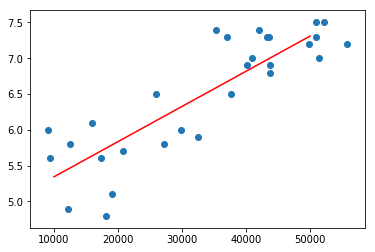

In [12]:
pl.plot(test_X,test_Y,"r")
pl.scatter(X,y)
pl.show()

In [13]:
#训练一个Ridge模型
model1=LM.Ridge(0.6)

In [14]:
model1.fit(X,y)
X_new = [[22587]]  # Cyprus' GDP per capita
print(model1.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


In [15]:
test_X=[[10000],[20000],[30000],[40000],[50000]]
test_Y=model1.predict(test_X)
test_Y

array([[5.34420726],
       [5.83536172],
       [6.32651618],
       [6.81767064],
       [7.30882509]])

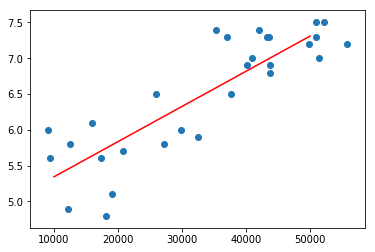

In [16]:
pl.plot(test_X,test_Y,"r")
pl.scatter(X,y)
pl.show()

In [17]:
#训练一个Lasso
model2=LM.Lasso(alpha=0.6)
model2.fit(X,y)
X_new=[[22587]]
model2.predict(X_new)

array([5.96245466])

In [18]:
test_X=[[10000],[20000],[30000],[40000],[50000]]
test_Y=model2.predict(test_X)
test_Y

array([5.34427499, 5.83540049, 6.326526  , 6.8176515 , 7.30877701])

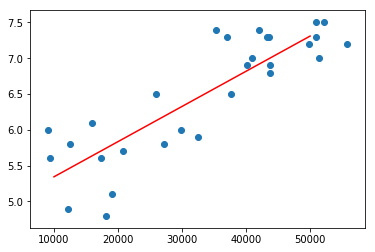

In [19]:
pl.plot(test_X,test_Y,"r")
pl.scatter(X,y)
pl.show()

In [20]:
#训练一个Bayesian Ridge Regression

In [21]:
model3=LM.BayesianRidge()
model2.fit(X,y)
X_new=[[22587]]
model2.predict(X_new)

array([5.96245466])

In [22]:
test_X=[[10000],[20000],[30000],[40000],[50000]]
test_Y=model2.predict(test_X)
test_Y

array([5.34427499, 5.83540049, 6.326526  , 6.8176515 , 7.30877701])

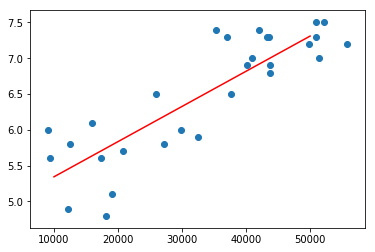

In [23]:
pl.plot(test_X,test_Y,"r")
pl.scatter(X,y)
pl.show()